In [40]:
import pandas as pd
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')
import re
import matplotlib.pyplot as plt
import numpy as np
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc
#Step 1 data analysis
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
#Only using % of data
#train = train.sample(frac=0.2, random_state=42)
#test = test.sample(frac=0.2, random_state=42)
#drop missing values
train.dropna(subset=['Text'], inplace=True)
test.dropna(subset=['Text'], inplace=True)
print(train)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mz800\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


           Index  Sentiment                                               Text
0              0          0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1              1          0  is upset that he can't update his Facebook by ...
2              2          0  @Kenichan I dived many times for the ball. Man...
3              3          0    my whole body feels itchy and like its on fire 
4              4          0  @nationwideclass no, it's not behaving at all....
...          ...        ...                                                ...
1048570  1048570          1  Back home, thought I'd done for the week, but ...
1048571  1048571          1           My GrandMa is making Dinenr with my Mum 
1048572  1048572          1  Mid-morning snack time... A bowl of cheese noo...
1048573  1048573          1  @ShaDeLa same here  say it like from the Termi...
1048574  1048574          1             @DestinyHope92 im great thaanks  wbuu?

[1048575 rows x 3 columns]


In [41]:
#Step 2 Text Preprocessing
#remove non-letter characters
train['Text'] = train['Text'].str.replace('[^a-zA-Z ]','', regex=True)
test['Text'] = test['Text'].str.replace('[^a-zA-Z ]','', regex=True)
#convert to lower case
train['Text'] = train['Text'].str.lower()
test['Text'] = test['Text'].str.lower()
#remove extra white space
train['Text'] = train['Text'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())
test['Text'] = test['Text'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())
print(train)

           Index  Sentiment                                               Text
0              0          0  switchfoot httptwitpiccomyzl awww thats a bumm...
1              1          0  is upset that he cant update his facebook by t...
2              2          0  kenichan i dived many times for the ball manag...
3              3          0     my whole body feels itchy and like its on fire
4              4          0  nationwideclass no its not behaving at all im ...
...          ...        ...                                                ...
1048570  1048570          1  back home thought id done for the week but jus...
1048571  1048571          1            my grandma is making dinenr with my mum
1048572  1048572          1  midmorning snack time a bowl of cheese noodles...
1048573  1048573          1  shadela same here say it like from the termini...
1048574  1048574          1                  destinyhope im great thaanks wbuu

[1048575 rows x 3 columns]


In [42]:
#Step 3 extract features

#bag of words
BOW = CountVectorizer()
trainX = BOW.fit_transform(train['Text'])
testX = BOW.transform(test['Text'])

#tfidf
TFIDF = TfidfVectorizer()
trainTFIDF = TFIDF.fit_transform(train['Text'])
testTFIDF = TFIDF.transform(test['Text'])




BOW performance with Logistical regression
              precision    recall  f1-score   support

           0       0.66      0.93      0.77       177
           1       0.88      0.53      0.66       182

    accuracy                           0.73       359
   macro avg       0.77      0.73      0.72       359
weighted avg       0.77      0.73      0.72       359

BOW performance with Naive Bayes
              precision    recall  f1-score   support

           0       0.60      0.95      0.73       177
           1       0.88      0.38      0.53       182

    accuracy                           0.66       359
   macro avg       0.74      0.66      0.63       359
weighted avg       0.74      0.66      0.63       359



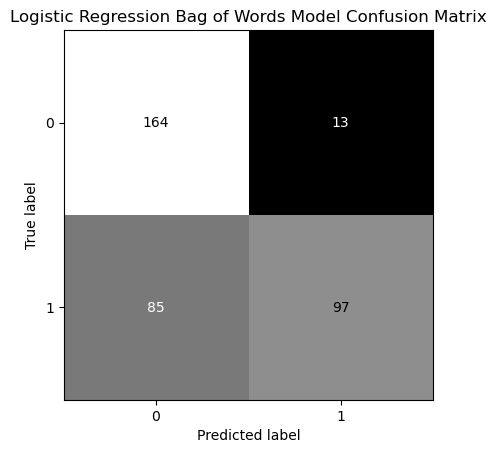

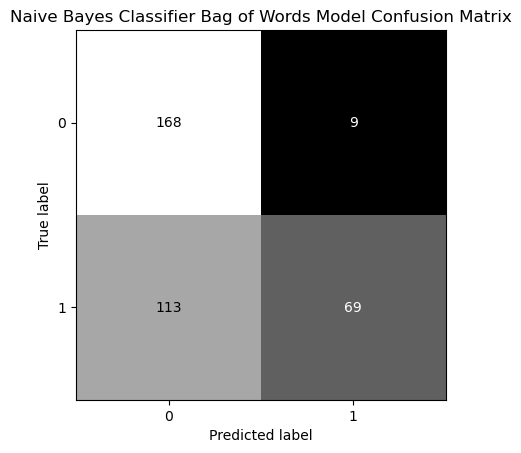

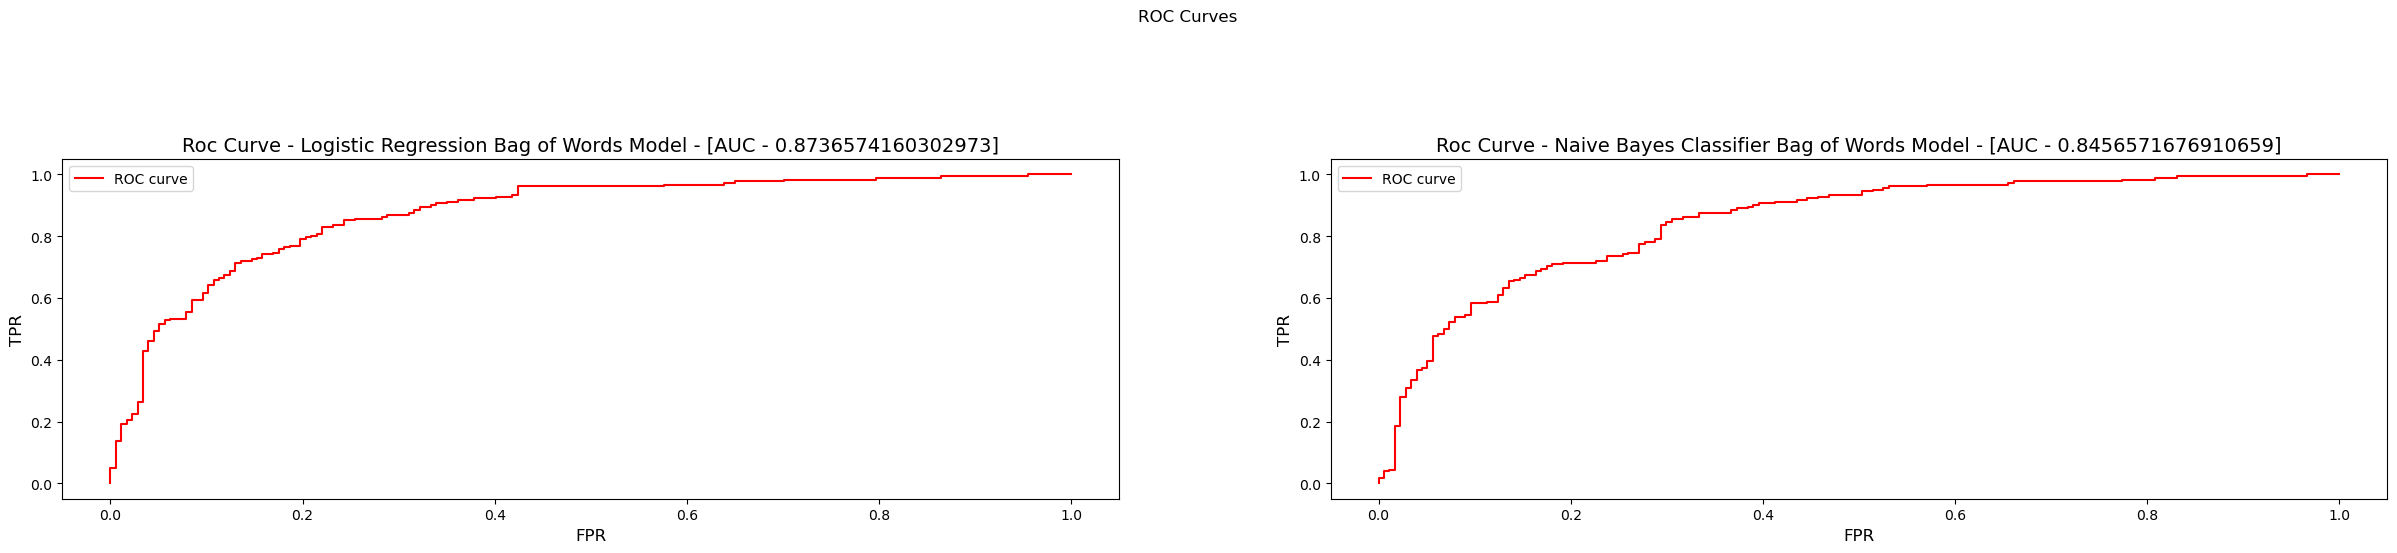

In [43]:
#Step 4 Sentiment models/BOW
testY = test['Sentiment'].values
trainY = train['Sentiment'].values

#train LR model BOW
lr = LogisticRegression(random_state=56, max_iter = 1100000)
lr.fit(trainX,trainY)
#predict data
lrpredicted = lr.predict(testX)
lrpredictedP = lr.predict_proba(testX)

print('BOW performance with Logistical regression')
print(classification_report(testY, lrpredicted))

#train NB model BOW
nb = MultinomialNB()
nb.fit(trainX,trainY)
#predict data
nbpredicted = nb.predict(testX)
nbpredictedP = nb.predict_proba(testX)

print('BOW performance with Naive Bayes')
print(classification_report(testY, nbpredicted))

models = ['Logistic Regression Bag of Words Model','Naive Bayes Classifier Bag of Words Model']
predictions = [lrpredicted, nbpredicted]
pred_probabilities = [lrpredictedP, nbpredictedP]

plot = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(testY.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(testY, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    # pyplot.figure(figsize=(5, 5))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()



TFIDF performance with Logistical regression
              precision    recall  f1-score   support

           0       0.69      0.95      0.80       177
           1       0.92      0.58      0.71       182

    accuracy                           0.76       359
   macro avg       0.81      0.77      0.76       359
weighted avg       0.81      0.76      0.76       359

TFIDF performance with Naive Bayes
              precision    recall  f1-score   support

           0       0.50      0.99      0.66       177
           1       0.75      0.03      0.06       182

    accuracy                           0.50       359
   macro avg       0.62      0.51      0.36       359
weighted avg       0.63      0.50      0.36       359



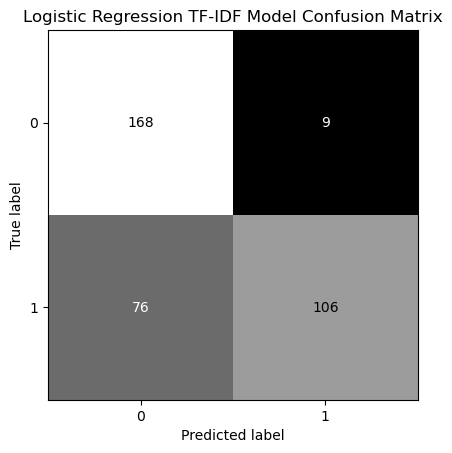

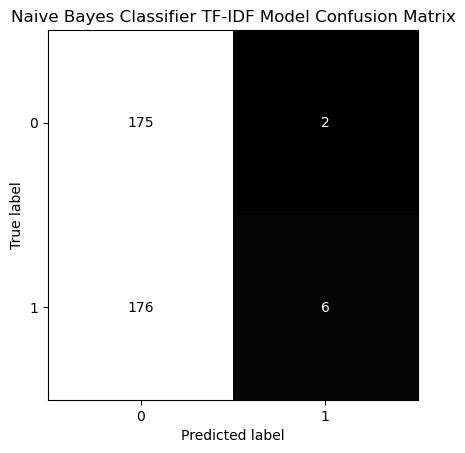

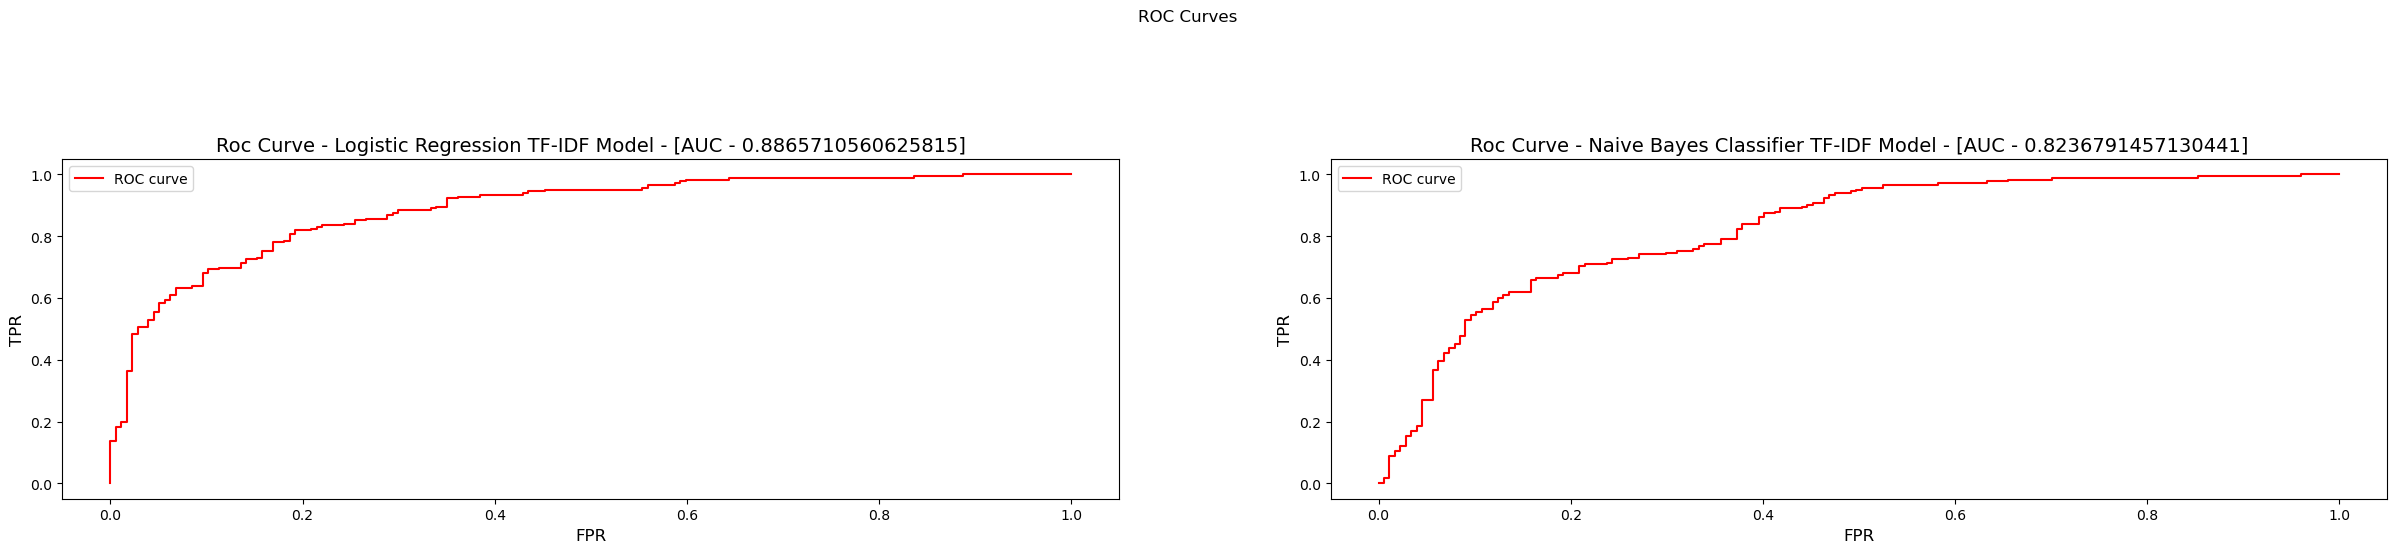

In [44]:
#Step 4 Sentiment models/TFIDF
lr = LogisticRegression(random_state=56, max_iter = 1100000)
lr.fit(trainTFIDF,trainY)
#predict data
lrpredicted = lr.predict(testTFIDF)
lrpredictedP = lr.predict_proba(testTFIDF)

print('TFIDF performance with Logistical regression')
print(classification_report(testY, lrpredicted))

#train NB model TFIDF
nb = MultinomialNB()
nb.fit(trainTFIDF,trainY)
#predict data
nbpredicted = nb.predict(testTFIDF)
nbpredictedP = nb.predict_proba(testTFIDF)

print('TFIDF performance with Naive Bayes')
print(classification_report(testY, nbpredicted))

models = ['Logistic Regression TF-IDF Model','Naive Bayes Classifier TF-IDF Model']
predictions = [lrpredicted, nbpredicted]
pred_probabilities = [lrpredictedP, nbpredictedP]

plot = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(testY.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(testY, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    # pyplot.figure(figsize=(5, 5))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()
